In [1]:
!date

Wed Jul 20 13:38:35 EDT 2022


In [2]:
pwd

'/mmfs1/data/bergerar/BC-MRI-ADHD/Code'

In [3]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from make_models import get_MRI_VAE_3D,get_MRI_CVAE_3D
from tqdm import tqdm 
import tensorflow as tf

2022-07-20 13:39:24.894227: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/local/apps/gcc/9.2.0/lib:/cm/local/apps/gcc/9.2.0/lib64:/cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2022-07-20 13:39:24.894265: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
stuff = np.load('../Assets/brain_array-440.npz')
print(list(stuff.keys()))

data = stuff['data']
control = stuff['controls']
patients = stuff['patients']
n = data.shape[0]
print(data.shape)
data[patients,:,:,:].shape
data[patients].shape

['data', 'controls', 'patients']
(440, 64, 64, 64)


(179, 64, 64, 64)

In [5]:
cvae, z_encoder, s_encoder, cvae_decoder = get_MRI_CVAE_3D(input_shape=(64,64,64,1),
                    latent_dim=2,
                    beta=1,
                    disentangle=False,
                    gamma=1,
                    bias=True,
                    batch_size = 64,
                    kernel_size = 3,
                    filters = 32,
                    intermediate_dim = 128,
                    opt=None)

2022-07-20 13:39:55.243068: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-07-20 13:39:55.293461: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-20 13:39:55.293501: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c084): /proc/driver/nvidia/version does not exist
2022-07-20 13:39:55.294088: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-20 13:39:55.314400: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2400000000 Hz
2022-07-20 13:39:55.317228: I tensorf

In [12]:
cd ~/tf_weightsAB/weights_10000_epochs

/mmfs1/data/bergerar/tf_weightsAB/weights_10000_epochs


In [13]:
weights_fn = 'cvae_weights'
#weights_fn = os.path.expanduser(weights_fn)
cvae.load_weights(weights_fn)

In [14]:
data_patients = data[patients,:,:,:]
data_controls = data[~patients,:,:,:]

In [18]:
# latent vectors
bg_features_adhd = z_encoder.predict(data_patients)[0] # returns mean,std and sample of latent vectors, we take mean here
sl_features_adhd = s_encoder.predict(data_patients)[0]

In [32]:
reconstructions = cvae_decoder.predict(np.hstack((bg_features_adhd,sl_features_adhd)))
reconstructions = reconstructions[:,:,:,:,0]

In [33]:
reconstructions.shape

(179, 64, 64, 64)

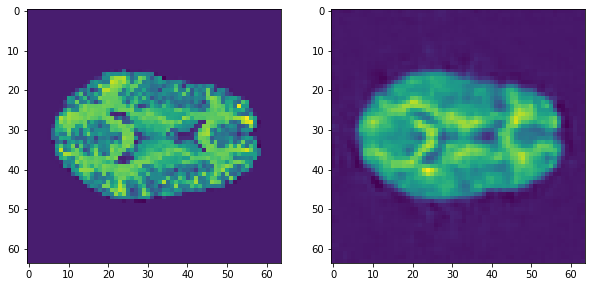

In [34]:
s = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(data_patients[s,:,:,32])
plt.subplot(1,2,2)
plt.imshow(reconstructions[s,:,:,32])

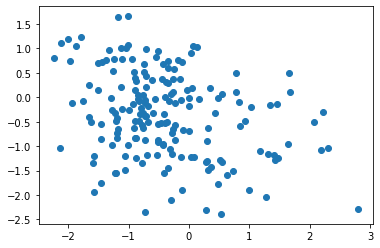

In [35]:
plt.scatter(bg_features_adhd[:,0],bg_features_adhd[:,1])

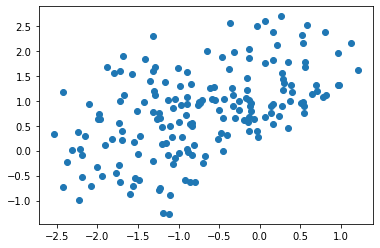

In [36]:
plt.scatter(sl_features_adhd[:,0],sl_features_adhd[:,1])